In [1]:
# Importing libraries.
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
# Data class.
class Data(Dataset):
    
    def __init__(self, train=True):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.f = -3*self.x + 1
        self.y = self.f + 0.1*torch.randn(self.x.size()) # Adding some noise.
        self.len = self.x.shape[0]

        if train == True: # Adding some outliers on training set.
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
    
    def __getitem__(self,index):

        return self.x[index], self.y[index]

    def __len__(self):

        return self.len

In [3]:
# Seperate data objects for train and validate.
train_data = Data()

val_data = Data(train=False)

In [4]:
# We create custom module or class as a subclass of nn module.
class LR(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [5]:
# nn module loss.
criterian = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

In [6]:
epochs = 10
# Fitting hyperparameters with validation data.
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1] # Different learning rates to fit the best.

# We seperate out the error also.
val_error = torch.zeros(len(learning_rates))
test_error = torch.zeros(len(learning_rates))

# Making a list of models.
Models = []

In [7]:
# Iterate through all learning rates.
for i, learning_rate in enumerate(learning_rates):
    model = LR(1,1)
    optimizer = optim.SGD(model.parameters(), lr= learning_rate)

    # Training.
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterian(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Calculating training error.
    yhat = model(train_data.x)
    loss = criterian(yhat, train_data.y)
    test_error[i] = loss.item()

    # Calculating validation error.
    yhat = model(val_data.x)
    loss = criterian(yhat, val_data.y)
    val_error[i] = loss.item()

    # Append models into the list.
    Models.append(model)

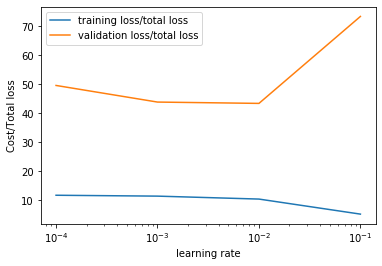

In [8]:
# Plotting both errors.
# Choose learning rate where both are closest.
plt.semilogx(np.array(learning_rates), val_error.numpy(), label = 'training loss/total loss')
plt.semilogx(np.array(learning_rates), test_error.numpy(), label = 'validation loss/total loss')
plt.xlabel('learning rate')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()